In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, average_precision_score

In [48]:
#Importing required libraries

In [54]:
!pip install kaggle

# Set up the Kaggle API (upload your kaggle.json first)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d kk0105/cicids2017

# Unzip and load the CSV file
import zipfile
with zipfile.ZipFile("cicids2017.zip", 'r') as zip_ref:
    zip_ref.extractall("cicids2017")

# Load the specific CSV file
df = pd.read_csv('cicids2017/Week_filtered.csv')
print(df.head())


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/kk0105/cicids2017
License(s): apache-2.0
 99% 280M/283M [00:02<00:00, 143MB/s]
100% 283M/283M [00:02<00:00, 108MB/s]
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                80      115550790                 31                      33   
1               443        5292756                  6                       4   
2                21              3                  2                       0   
3             54045             41                  1                       1   
4                80           1023                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          318                        38380   
1                          611                          168   
2                           1

In [55]:
# Load the dataset
file_path = "Week_filtered.csv"
df = pd.read_csv(file_path)

In [56]:
print(df.head())

   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0                80      115550790                 31                      33   
1               443        5292756                  6                       4   
2                21              3                  2                       0   
3             54045             41                  1                       1   
4                80           1023                  2                       0   

   Total Length of Fwd Packets  Total Length of Bwd Packets  \
0                          318                        38380   
1                          611                          168   
2                           14                            0   
3                            2                            6   
4                            0                            0   

   Fwd Packet Length Max  Fwd Packet Length Min  Fwd Packet Length Mean  \
0                    318                      0            

In [57]:
# Drop columns with all zero values or irrelevant columns
df = df.loc[:, (df != 0).any(axis=0)]

In [58]:
# Handle missing values
df.fillna(0, inplace=True)

In [59]:

# Encode the target variable (Label)
label_encoder = LabelEncoder()
df['Label'] = label_encoder.fit_transform(df['Label'])


In [60]:
# Define features (X) and target (y)
X = df.drop(columns=['Label'])
y = df['Label']

In [61]:
# Standardize the features
print("Checking for Infinity or NaN values in the dataset...")
print("Before cleaning:")
print(df.isna().sum())  # Check for NaN
print(np.isinf(df).sum())

Checking for Infinity or NaN values in the dataset...
Before cleaning:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 69, dtype: int64
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 69, dtype: int64


In [62]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


In [63]:
print("After cleaning:")
print(df.isna().sum())
print(np.isinf(df).sum())

After cleaning:
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 69, dtype: int64
Destination Port               0
Flow Duration                  0
Total Fwd Packets              0
Total Backward Packets         0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
Idle Std                       0
Idle Max                       0
Idle Min                       0
Label                          0
Length: 69, dtype: int64


In [64]:
# Replace Inf and -Inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with 0
X.fillna(0, inplace=True)

# Clip large values to a reasonable range to prevent overflow
X = X.clip(lower=-1e10, upper=1e10)

# Verify data before scaling
print("Any NaN values after cleaning:", np.isnan(X).sum().sum())
print("Any Infinite values after cleaning:", np.isinf(X).sum().sum())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check if scaling was successful
print("Scaling successful. Shape of X_scaled:", X_scaled.shape)

Any NaN values after cleaning: 0
Any Infinite values after cleaning: 0
Scaling successful. Shape of X_scaled: (543734, 68)


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [66]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [67]:
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:02:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [68]:
rf_predictions = rf_model.predict(X_test)
xgb_predictions = xgb_model.predict(X_test)

In [69]:
# Calculate metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60500
           1       1.00      0.95      0.97       590
           2       1.00      1.00      1.00     30250
           3       1.00      1.00      1.00      3088
           4       1.00      1.00      1.00     30250
           5       1.00      0.99      0.99      1650
           6       1.00      1.00      1.00      1739
           7       1.00      1.00      1.00      2381
           8       1.00      1.00      1.00     30250
           9       1.00      1.00      1.00      1769
          10       0.72      0.88      0.80       452
          11       1.00      0.17      0.29         6
          12       0.46      0.22      0.30       196

    accuracy                           1.00    163121
   macro avg       0.94      0.86      0.87    163121
weighted avg       1.00      1.00      1.00    163121

Random Forest Accuracy: 1.00

XGBoost Clas

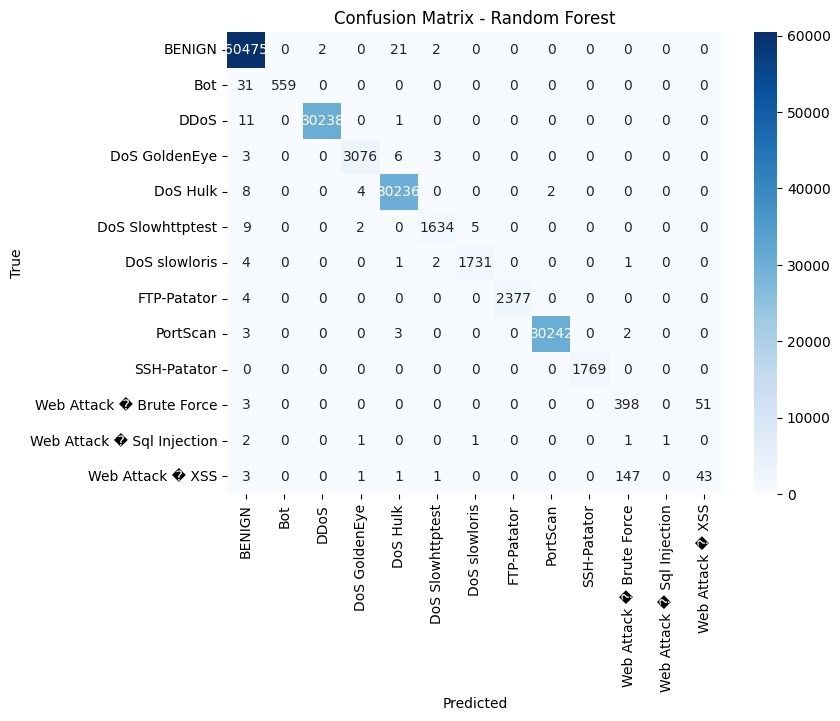

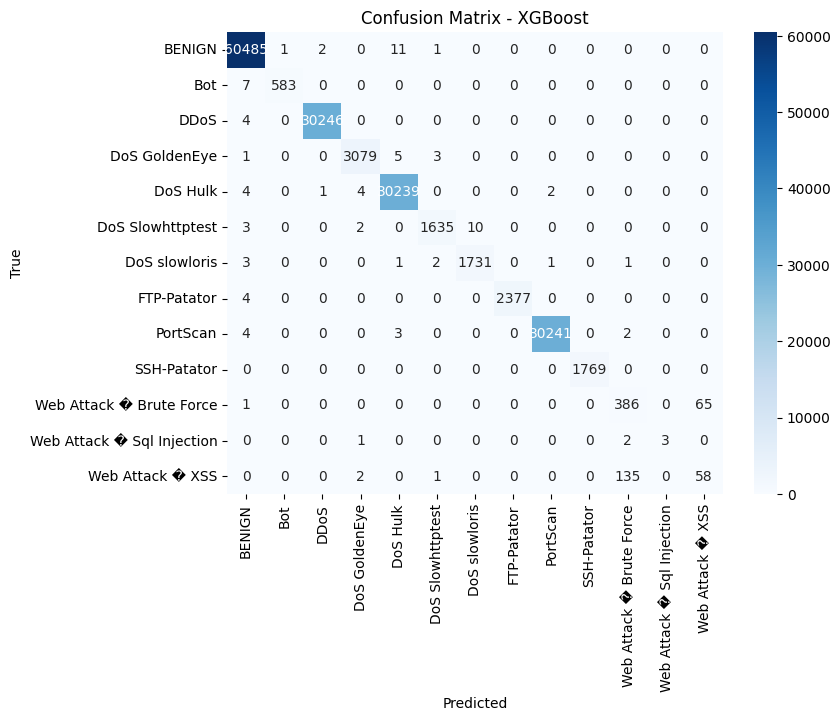

In [70]:
# Confusion Matrix Plot
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix("Random Forest", y_test, rf_predictions)
plot_confusion_matrix("XGBoost", y_test, xgb_predictions)

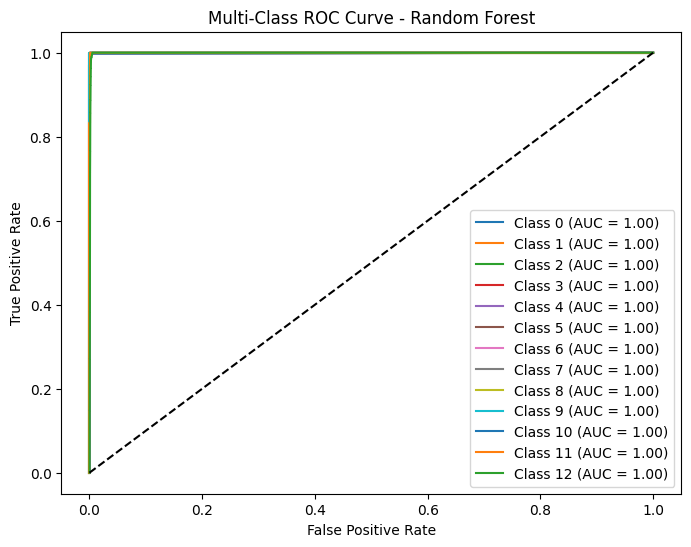

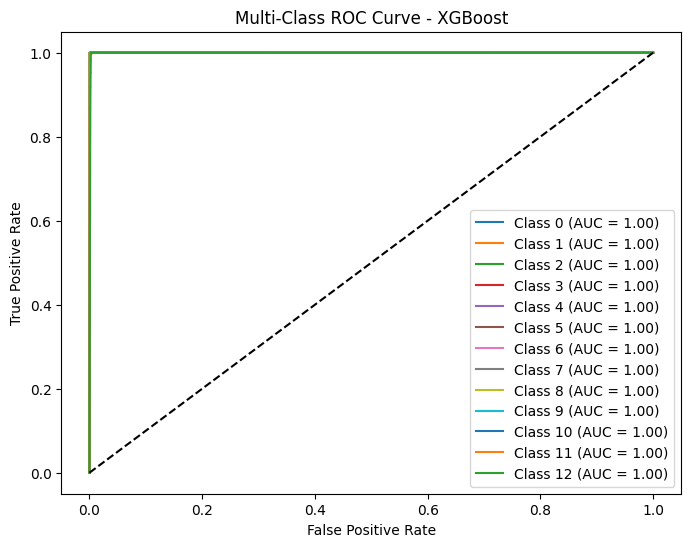

In [71]:
def plot_multi_class_roc_curve(model_name, y_true, y_prob):
    plt.figure(figsize=(8, 6))
    n_classes = y_prob.shape[1]
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true, y_prob[:, i], pos_label=i)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'Multi-Class ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Get probability predictions for all classes
rf_prob = rf_model.predict_proba(X_test)
xgb_prob = xgb_model.predict_proba(X_test)

# Plot ROC curves
plot_multi_class_roc_curve("Random Forest", y_test, rf_prob)
plot_multi_class_roc_curve("XGBoost", y_test, xgb_prob)

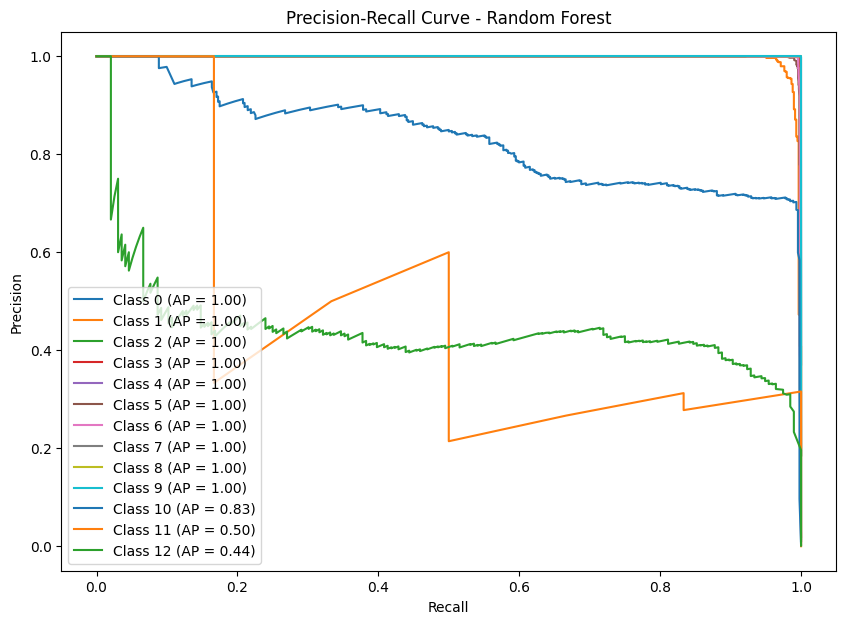

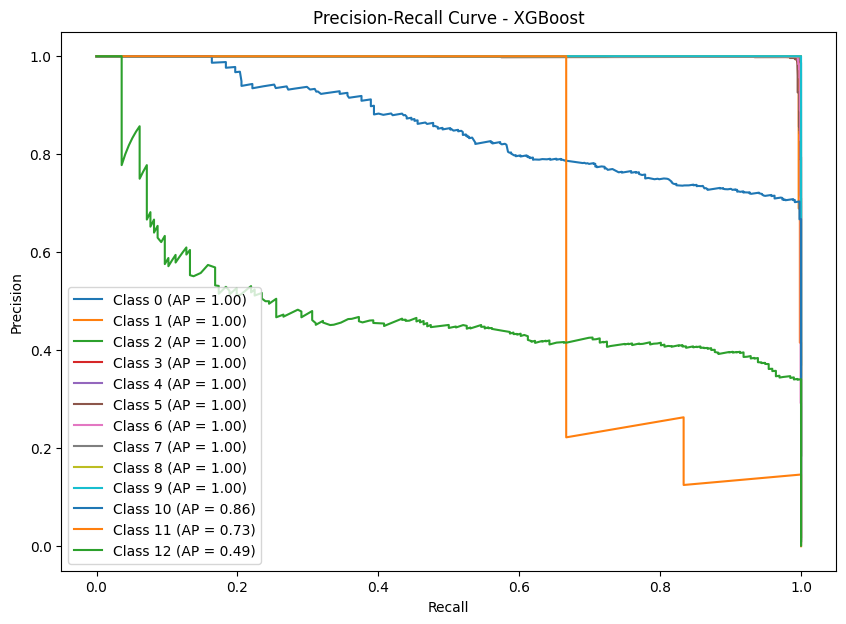

In [72]:
def plot_multi_class_precision_recall_curve(model_name, y_true, y_prob):
    plt.figure(figsize=(10, 7))
    n_classes = y_prob.shape[1]

    # Binarize the true labels for multi-class precision-recall calculation
    y_true_binarized = pd.get_dummies(y_true)

    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_binarized.iloc[:, i], y_prob[:, i])
        avg_precision = average_precision_score(y_true_binarized.iloc[:, i], y_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i} (AP = {avg_precision:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.show()

# Get probability predictions for all classes
rf_prob = rf_model.predict_proba(X_test)
xgb_prob = xgb_model.predict_proba(X_test)

# Plot Precision-Recall curves
plot_multi_class_precision_recall_curve("Random Forest", y_test, rf_prob)
plot_multi_class_precision_recall_curve("XGBoost", y_test, xgb_prob)

In [73]:

# Example Prediction
sample_data = X_test[:10]
rf_pred = rf_model.predict(sample_data)
xgb_pred = xgb_model.predict(sample_data)

In [74]:
print("\nSample Prediction (Random Forest):", label_encoder.inverse_transform(rf_pred))
print("Sample Prediction (XGBoost):", label_encoder.inverse_transform(xgb_pred))


Sample Prediction (Random Forest): ['BENIGN' 'BENIGN' 'DDoS' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN' 'BENIGN'
 'BENIGN' 'DDoS']
Sample Prediction (XGBoost): ['BENIGN' 'BENIGN' 'DDoS' 'BENIGN' 'BENIGN' 'BENIGN' 'DDoS' 'BENIGN'
 'BENIGN' 'DDoS']
